<a href="https://colab.research.google.com/github/MichaelDeyid/Parcial-2/blob/main/parcial_2_(Tercer_punto)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Western Reserve Experiments


Sea la base de datos para el monitoreo de condición (fallos) en rodamientos a partir del análisis de vibraciones descrita en [Case Western Reserve Experiments](https://engineering.case.edu/bearingdatacenter). Las señales fueron adquiridas para las siguientes condiciones (clases): i) Normal bearing (Nor), fault in the internal train (IR1), fault in the external train (IR2), and fault in the rolling element-ball (BE). Además, los fallos se generaron para tres niveles de severidad (profundidad): 0.007′′, 0.014′′, and 0.021′′ y tres velocidades de operación (1730, 1750, 1772, and 1797 [rpm]). Los datos fueron adquiridos a 12 kHz. Por consiguiente, se tienen los siguientes parámetros de estudio: $F_s=12k$ [Hz] cantidad de puntos en el tiempo $4096$ y cantidad de clases $C = 10$.

Grafique la señal promedio de cada fallo en el tiempo y en la frecuencia.

Utilizando la transformada rápida de Fourier diseñe y construya un detector fallos en rodamientos a partir de señales de vibración y sus etiquetas en los arreglos Xtrain y Ytrain (ver cuaderno de apoyo). Genere las predicciones de fallos para el arreglo Xtest.

In [1]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-11-07 22:54:34--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 64.233.188.101, 64.233.188.100, 64.233.188.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dnjf52gsata42op29hsuj1a3i55bhkj8/1699397625000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=e8fecae3-ebfa-4922-92e7-7da25482bf6b [following]
--2023-11-07 22:54:34--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dnjf52gsata42op29hsuj1a3i55bhkj8/1699397625000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=e8fecae3-ebfa-4922-92e7-7da25482bf6b
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.174.132,

In [2]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [3]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [4]:
print(Ytrue.shape) #etique membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [5]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [6]:
#calcular espectro de Fourier Xtrain
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

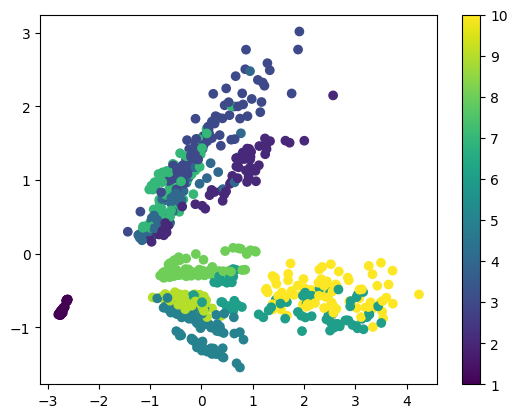

In [7]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

In [8]:
np.unique(Ytrain)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

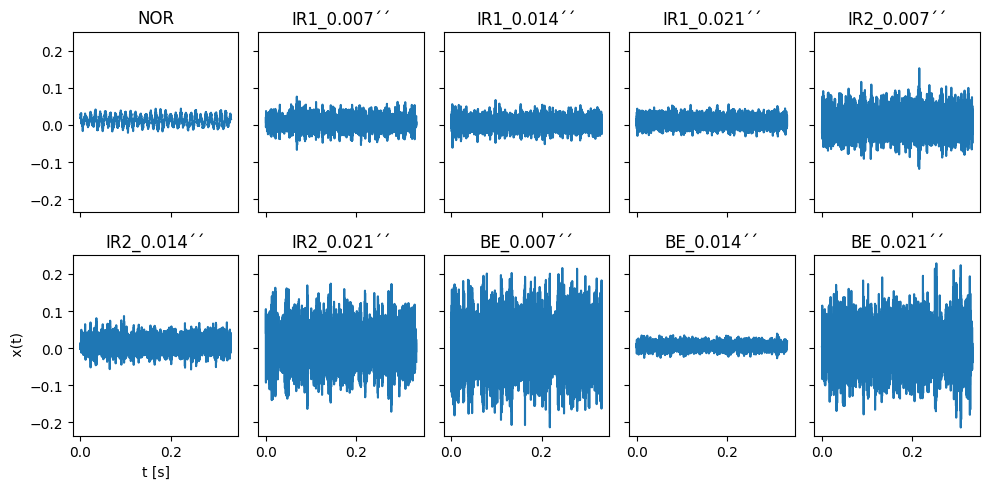

In [9]:
#graficar señales en tiempo y en frecuencia desde Xtrain y Ytrain

nrows = 2
ncols = 5

#grafica en el tiempo señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(tv,Xtrain[Ytrain==ncols*i+j+1].mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('t [s]')
ax[1,0].set_ylabel(' x(t)')
plt.tight_layout()
plt.show()

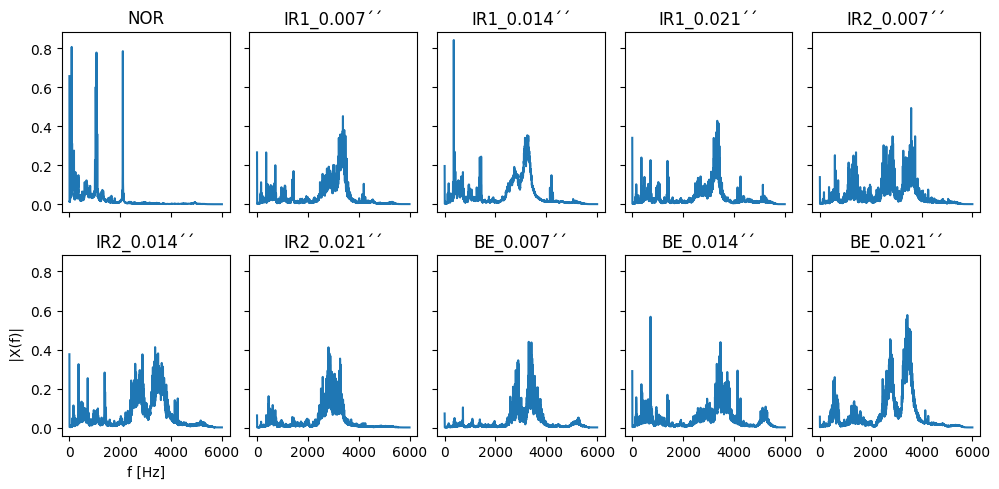

In [10]:
#grafica frecuencia - señales promedio por clase
fig, ax = plt.subplots(nrows = nrows, ncols = ncols,
                       sharex = True, sharey=True, figsize=(10,5))
tv = np.arange(0,Tl,1/Fs)
for i in range(nrows):
  for j in range(ncols):
     ax[i,j].plot(vf,abs(Xw_[Ytrain==ncols*i+j+1]).mean(axis=0))
     ax[i,j].set_title(labels_[ncols*i+j])
ax[1,0].set_xlabel('f [Hz]')
ax[1,0].set_ylabel(' |X(f)|')
plt.tight_layout()
plt.show()


In [11]:
from scipy.spatial.distance import cdist
#fft Xtest
Xwt = (abs(np.fft.rfft(Xtest))) # FFT
Xwt_ = sca_.fit_transform(Xwt.T).T

Dtr_te = cdist(Xw_,Xwt_)
Dtr_te.shape #distancias espectros Xtrain vs Xtest

(840, 360)

In [12]:
ind_ = np.argmin(Dtr_te,axis=0)
ind_.shape

(360,)

In [15]:
Ytest_e = Ytrain[ind_]
Ytest_e

array([ 2,  6,  8,  8,  3,  3,  4,  7,  8,  5,  6,  1,  1,  3,  1,  5,  5,
        9,  1,  1,  9,  1,  7,  2,  2,  7, 10,  2,  7, 10,  3,  1,  1,  9,
       10,  9, 10, 10,  3,  3,  6,  8,  4,  2,  4,  9,  5,  2,  7,  7,  7,
        3,  7,  2,  4,  8,  8,  1,  5,  3,  5, 10,  7, 10,  1,  6,  5,  4,
        7,  3,  4,  6,  2,  5,  8,  8,  1,  7,  4,  9,  1,  5,  1,  9,  1,
        7,  6, 10,  9,  6,  8,  3,  4,  9,  2,  3,  9,  6,  9,  3,  1,  1,
        4,  8,  8,  8,  7,  4, 10,  6, 10,  5,  5,  9,  2,  9, 10,  2,  9,
        2,  5, 10,  5,  8, 10,  1,  8, 10,  3,  5,  4,  9, 10, 10,  6,  4,
        9,  6,  6,  9,  6,  2,  7,  8,  9,  5,  4,  8,  2,  2,  4,  6,  4,
        9,  1,  4,  9,  9,  8,  2,  9,  2,  2,  8,  7, 10, 10,  7,  2,  9,
        7,  2,  9,  7,  5,  9,  5,  1,  1,  2,  1,  4, 10,  2,  1,  6,  5,
        7,  4,  3,  4, 10,  8,  4,  7,  1,  4,  9,  8,  2,  1,  5,  3,  4,
        9,  9,  6,  6,  3,  9, 10,  8,  3,  2,  8,  3,  4,  7,  1,  5,  5,
        3,  6,  8,  4,  4

In [14]:
from sklearn.metrics import accuracy_score

print(f"ACC={accuracy_score(Ytest,Ytest_e)}")


ACC=1.0
